In [1]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def plot_corr(df,size=10):    
    # Plot the correlation matrix
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(df, cmap='RdYlGn')
    plt.xticks(range(len(df.columns)), df.columns, rotation=90);
    plt.yticks(range(len(df.columns)), df.columns);

In [3]:
# Generate 50 variables with 1000 samples
n_variables = 50
n_samples = 1000

# Those variables will be spread over 3 clusters of variable sizes
cluster_size = [5,22,28]
n_clusters = len(cluster_size)

# Assign each variable to a cluster
belongs_to_cluster = [i for i, c in enumerate(cluster_size) for n in range(c)]
np.random.shuffle(belongs_to_cluster)

# This latent data is used to make variables that belong
# to the same cluster correlated.
latent = np.random.randn(n_clusters, n_samples)

variables = []
for i in range(n_variables):
    variables.append(np.random.randn(n_samples) + latent[belongs_to_cluster[i], :])

df = pd.DataFrame(np.array(variables).transpose()).corr()

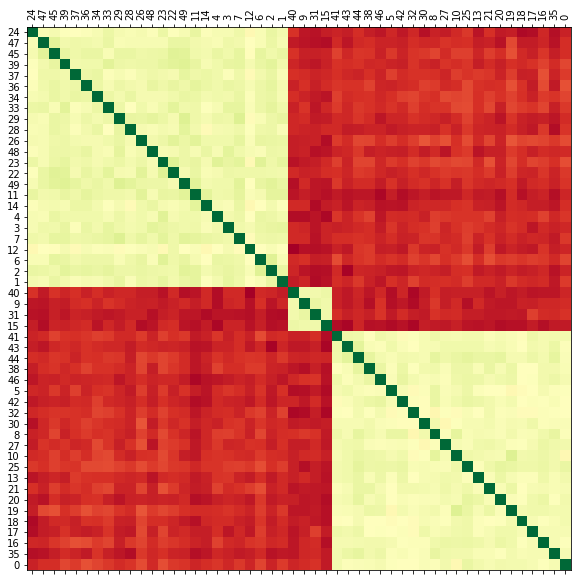

In [5]:
def hierarchical_clustering(corr_df):
    dist = sch.distance.pdist(corr_df.values)
    link = sch.linkage(dist, method='complete')
    index = sch.fcluster(link, dist.max()/2, 'distance')
    columns = corr_df.columns.tolist()
    columns = [columns[i] for i in np.argsort(index)]
    return corr_df.reindex(columns, axis=0).reindex(columns, axis=1)

plot_corr(hierarchical_clustering(df), size=10)

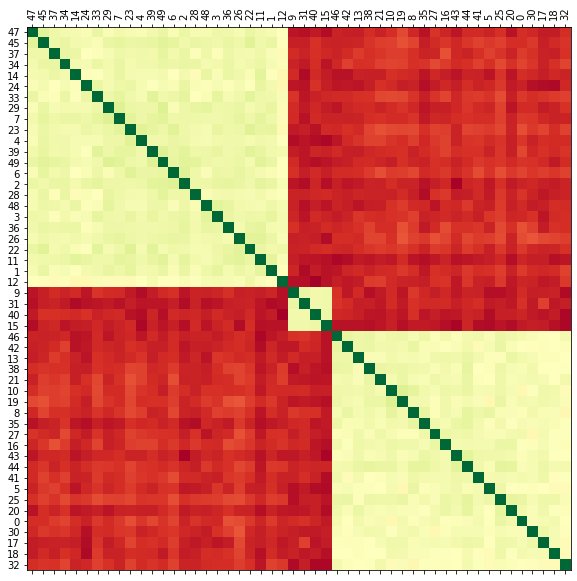

In [18]:
def two_phase_hierarchical_clustering(corr_df):
    dist = sch.distance.pdist(corr_df.values)
    link = sch.linkage(dist, method='complete')
    index = sch.fcluster(link, dist.max()/2, 'distance')
    columns = corr_df.columns.tolist()
    columns = [columns[i] for i in np.argsort(index)]
    corr_df = corr_df.reindex(columns, axis=0).reindex(columns, axis=1)
    
    _, counts = np.unique(index, return_counts=True)
    i, j = 0, 0
    columns = []
    for count in counts:
        j += count
        sub_corr_df = corr_df[corr_df.columns.values[i:j]].loc[corr_df.columns.values[i:j]]
        dist = sch.distance.pdist(sub_corr_df.values)
        link = sch.linkage(dist, method='complete')
        index = sch.fcluster(link, dist.max()/2, 'distance')
        sub_corr_col = sub_corr_df.columns.tolist()
        sub_corr_col = [sub_corr_col[ind] for ind in np.argsort(index)]
        i = j
        columns.extend(sub_corr_col)
    
    return corr_df.reindex(columns, axis=0).reindex(columns, axis=1)

plot_corr(two_phase_hierarchical_clustering(df), 10)